In [117]:
from duneanalytics import DuneAnalytics
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [87]:
# load env variables for dune
load_dotenv()

True

In [125]:
# initialize client
dune = DuneAnalytics(os.getenv('DUNE_USER'), os.getenv('DUNE_PASSWORD'))

# try to login
dune.login()

# fetch token
dune.fetch_auth_token()

In [126]:
result_id = dune.query_result_id(query_id=1283088)
# fetch query result
data = dune.query_result(result_id)
data = [d['data'] for d in [{k: v for k, v in d.items() if k == 'data'} for d in data['data']['get_result_by_result_id']]]
df = pd.DataFrame(data)

In [127]:
result_id = dune.query_result_id(query_id=1283093)
# fetch query result
data = dune.query_result(result_id)
data = [d['data'] for d in [{k: v for k, v in d.items() if k == 'data'} for d in data['data']['get_result_by_result_id']]]
df2 = pd.DataFrame(data)

In [128]:
result_id = dune.query_result_id(query_id=1283097)
# fetch query result
data = dune.query_result(result_id)
data = [d['data'] for d in [{k: v for k, v in d.items() if k == 'data'} for d in data['data']['get_result_by_result_id']]]
df3 = pd.DataFrame(data)

In [129]:
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)

In [130]:
df['base_fee_per_gas'] = df['base_fee_per_gas'] / 1e18
df['Burned ETH per Block'] = df['gas_used'] * df['base_fee_per_gas']
df['Block Usage'] = df['gas_used'] / df['gas_limit']

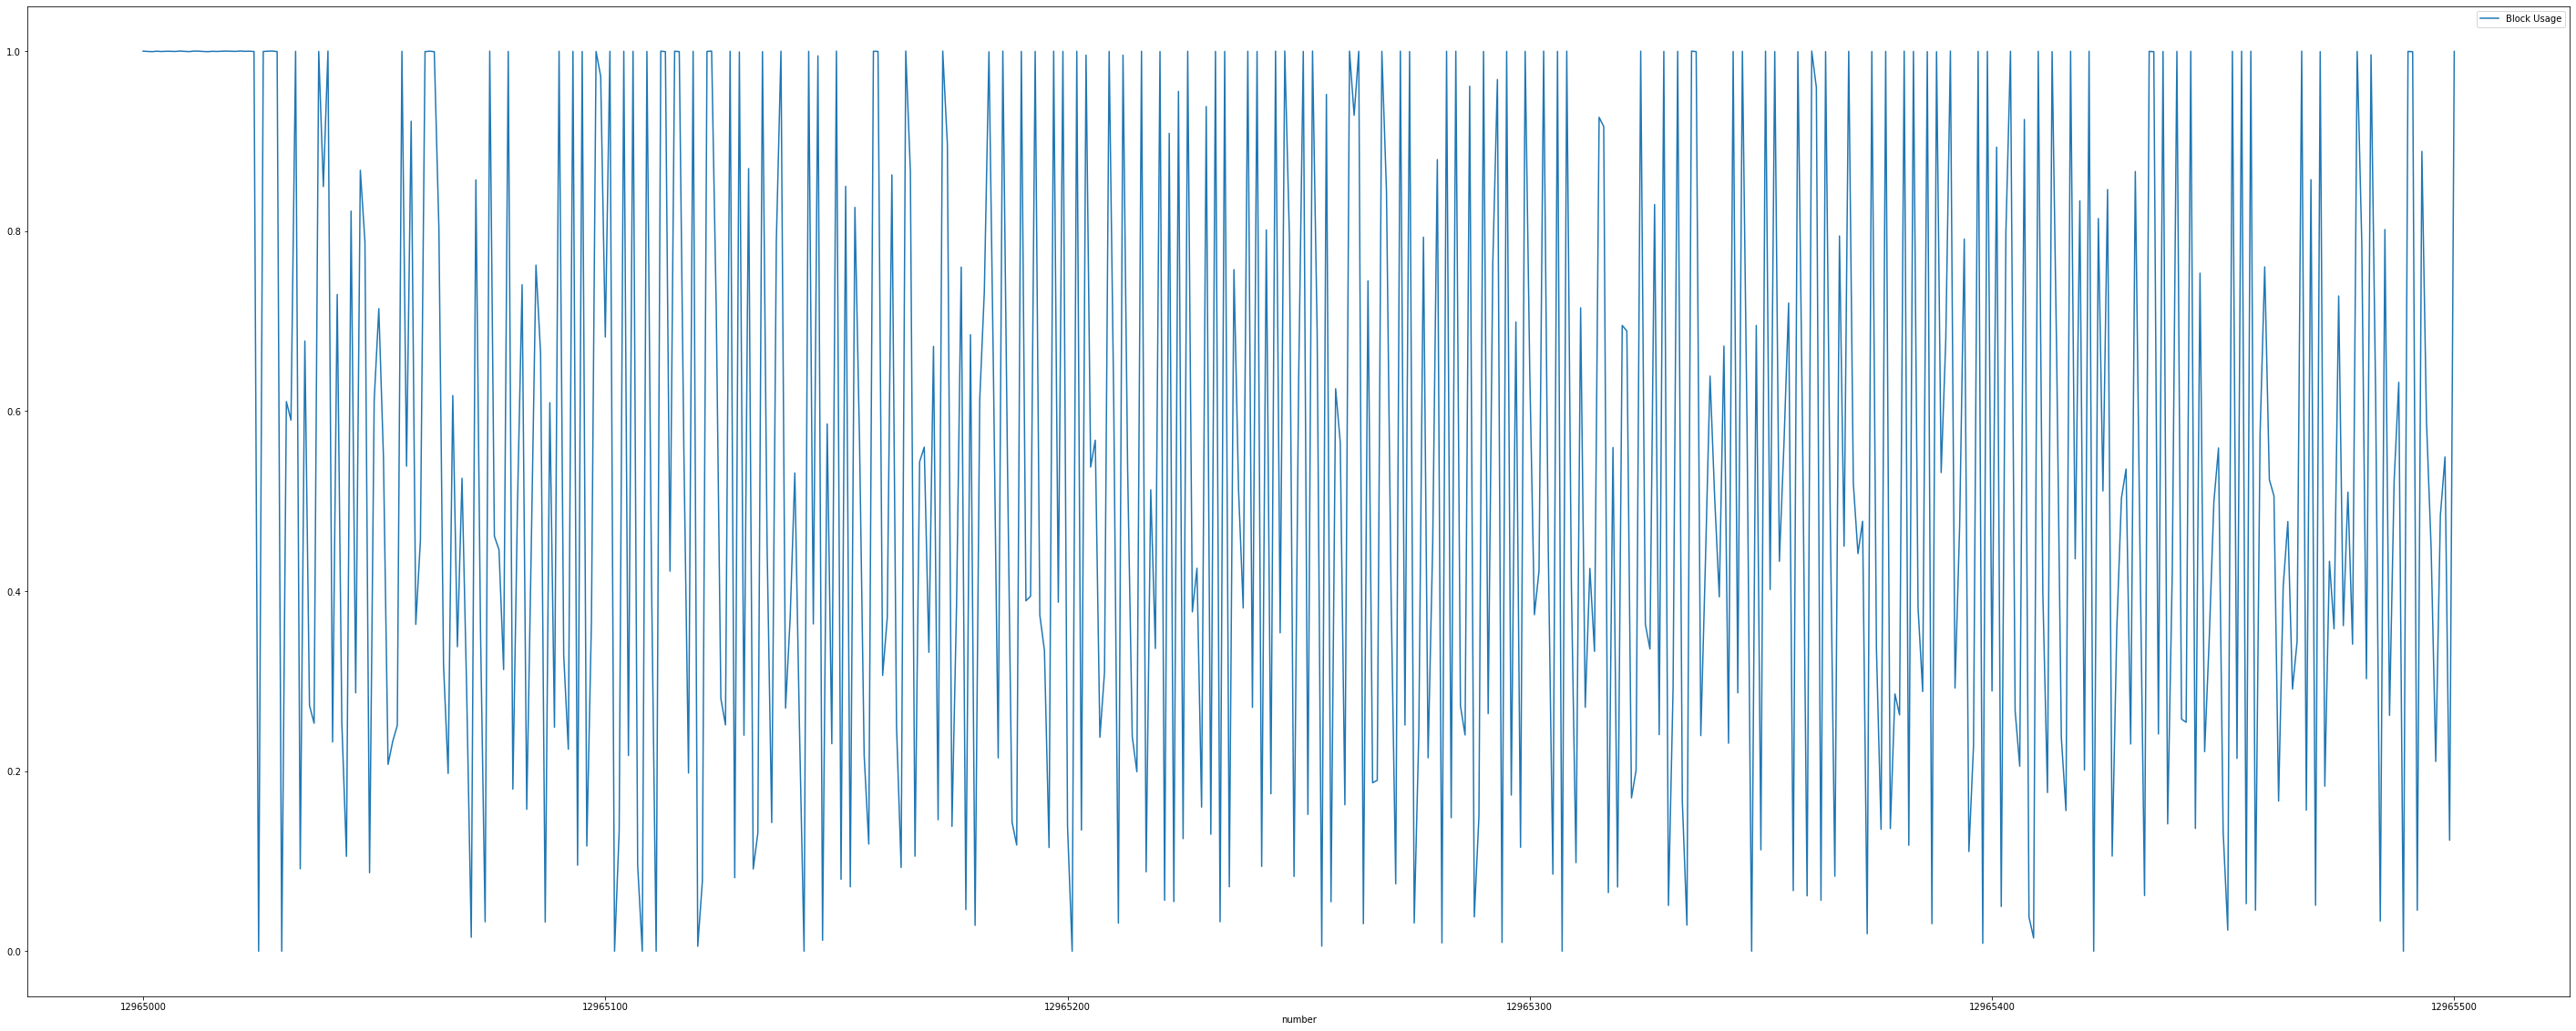

In [69]:
lines = df.loc[df['number']<= 12965500].plot.line(x='number', y=['Block Usage'], figsize=(50, 20))
lines.ticklabel_format(useOffset=False, style='plain')

In [72]:
df.loc[df['number']<= 12965500].describe().apply(lambda s: s.apply('{0:.5f}'.format))['Block Usage']

count    501.00000
mean       0.55228
std        0.36263
min        0.00000
25%        0.22166
50%        0.52385
75%        0.99932
max        0.99999
Name: Block Usage, dtype: object

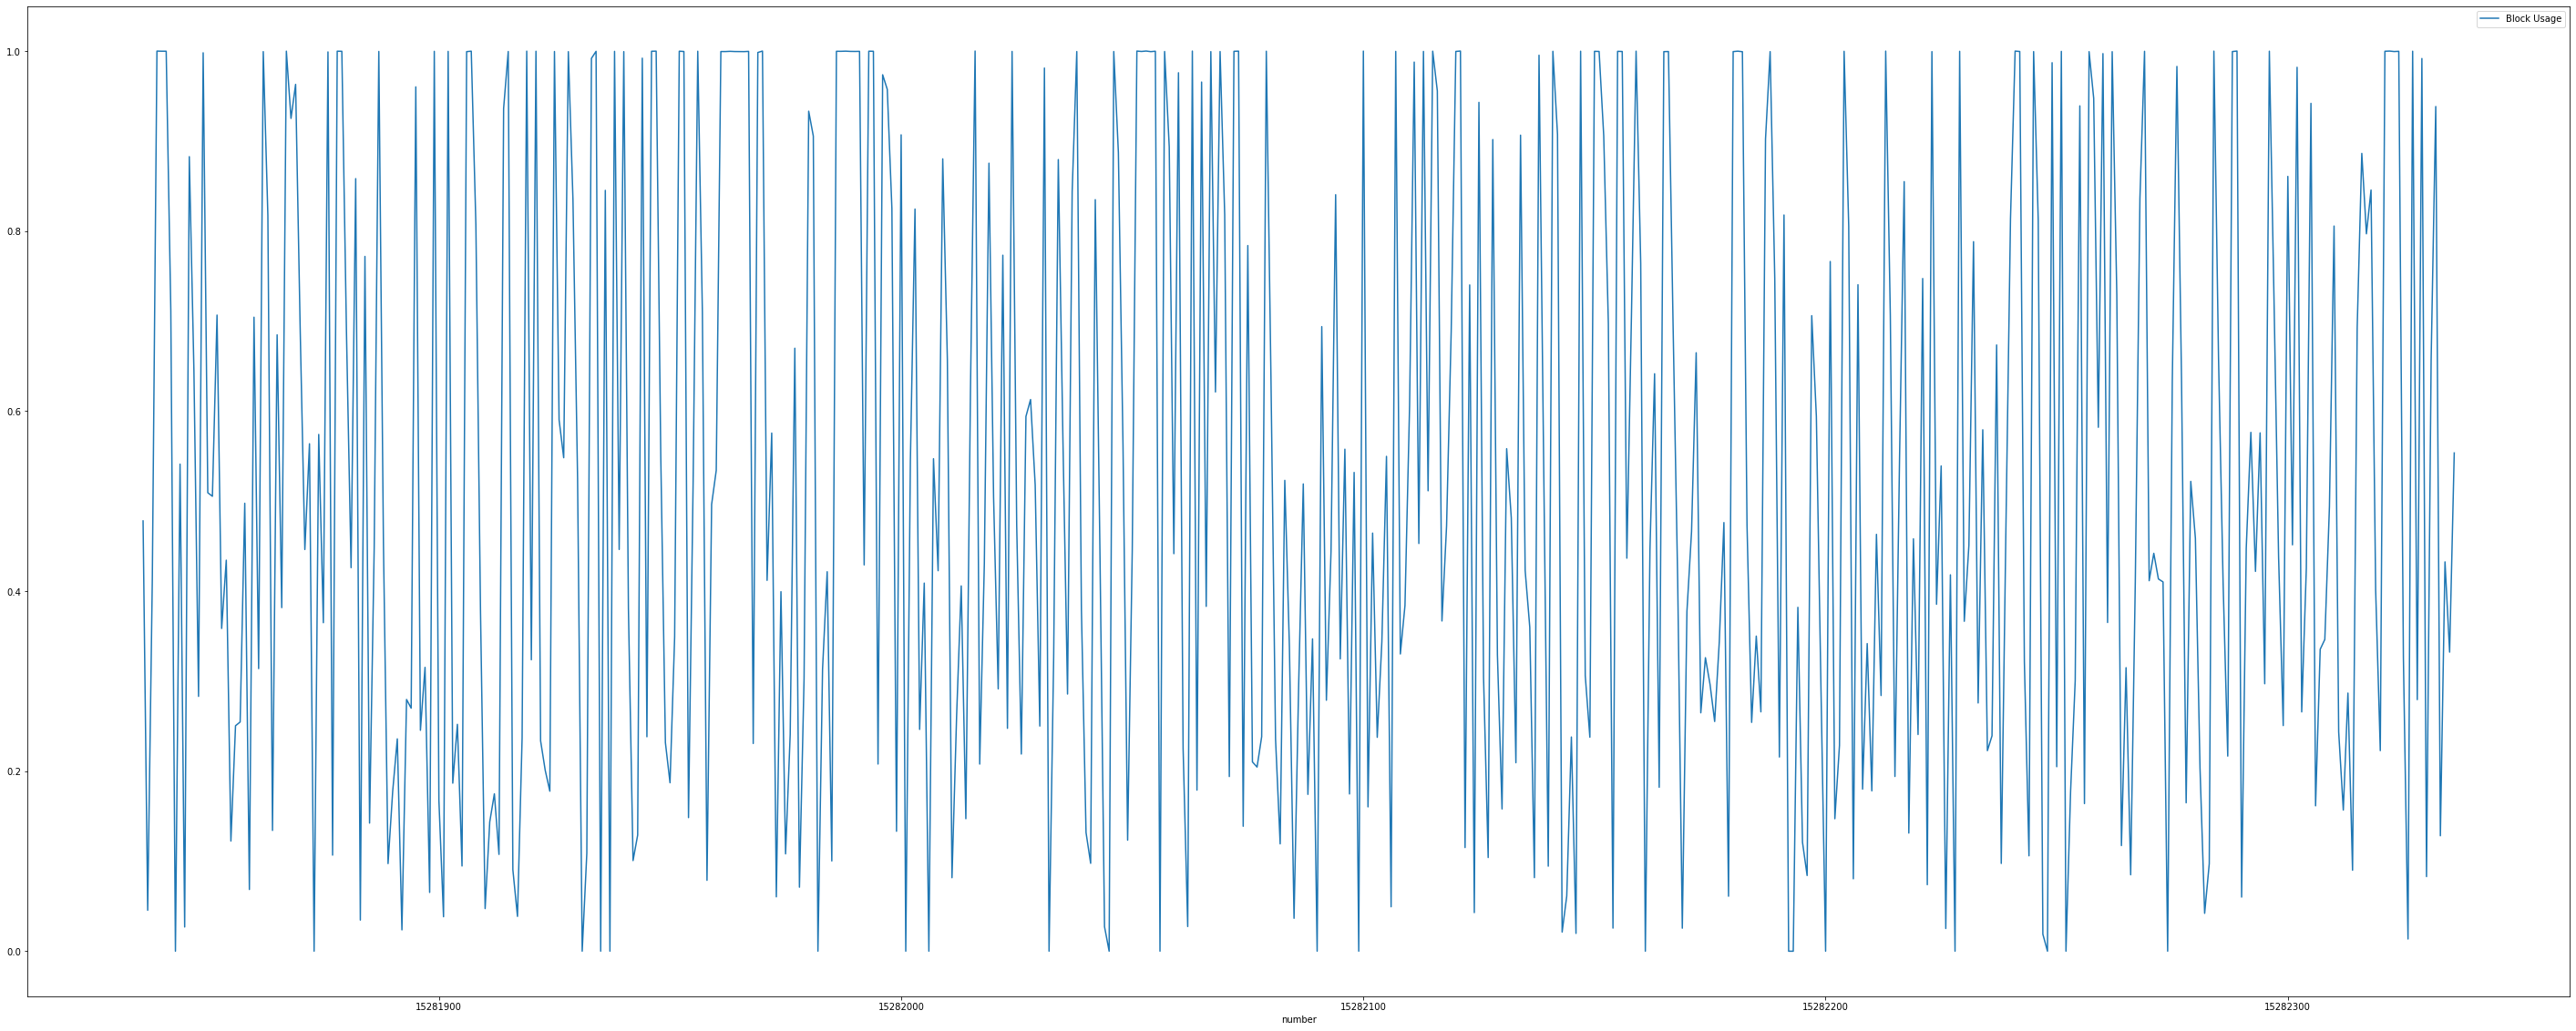

In [70]:
lines = df.loc[df['number']>= 15281836].plot.line(x='number', y=['Block Usage'], figsize=(50, 20))
lines.ticklabel_format(useOffset=False, style='plain')

In [73]:
df.loc[df['number']>= 15281836].describe().apply(lambda s: s.apply('{0:.5f}'.format))['Block Usage']

count    501.00000
mean       0.52620
std        0.34832
min        0.00000
25%        0.22864
50%        0.45875
75%        0.90692
max        1.00000
Name: Block Usage, dtype: object

In [83]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))['Block Usage']

count    2317337.00000
mean           0.51446
std            0.34161
min            0.00000
25%            0.20716
50%            0.46390
75%            0.87277
max            1.00000
Name: Block Usage, dtype: object

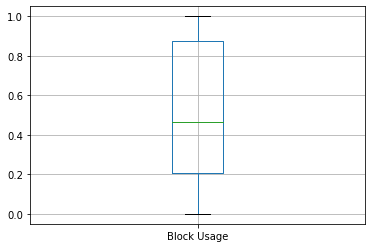

In [80]:
boxplot = df.boxplot(column=['Block Usage'])  

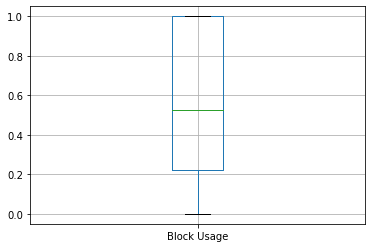

In [78]:
boxplot2 = df.loc[df['number']<= 12965500].boxplot(column=['Block Usage'])  

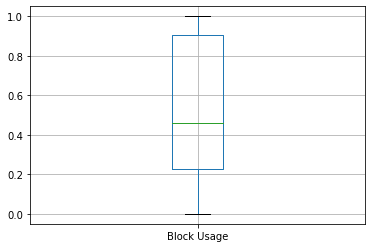

In [79]:
boxplot3 = df.loc[df['number']>= 15281836].boxplot(column=['Block Usage'])  

In [134]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format))['Burned ETH per Block']


count    2317337.00000
mean           1.10992
std            2.31512
min            0.00000
25%            0.27521
50%            0.69202
75%            1.45821
max          220.93511
Name: Burned ETH per Block, dtype: object

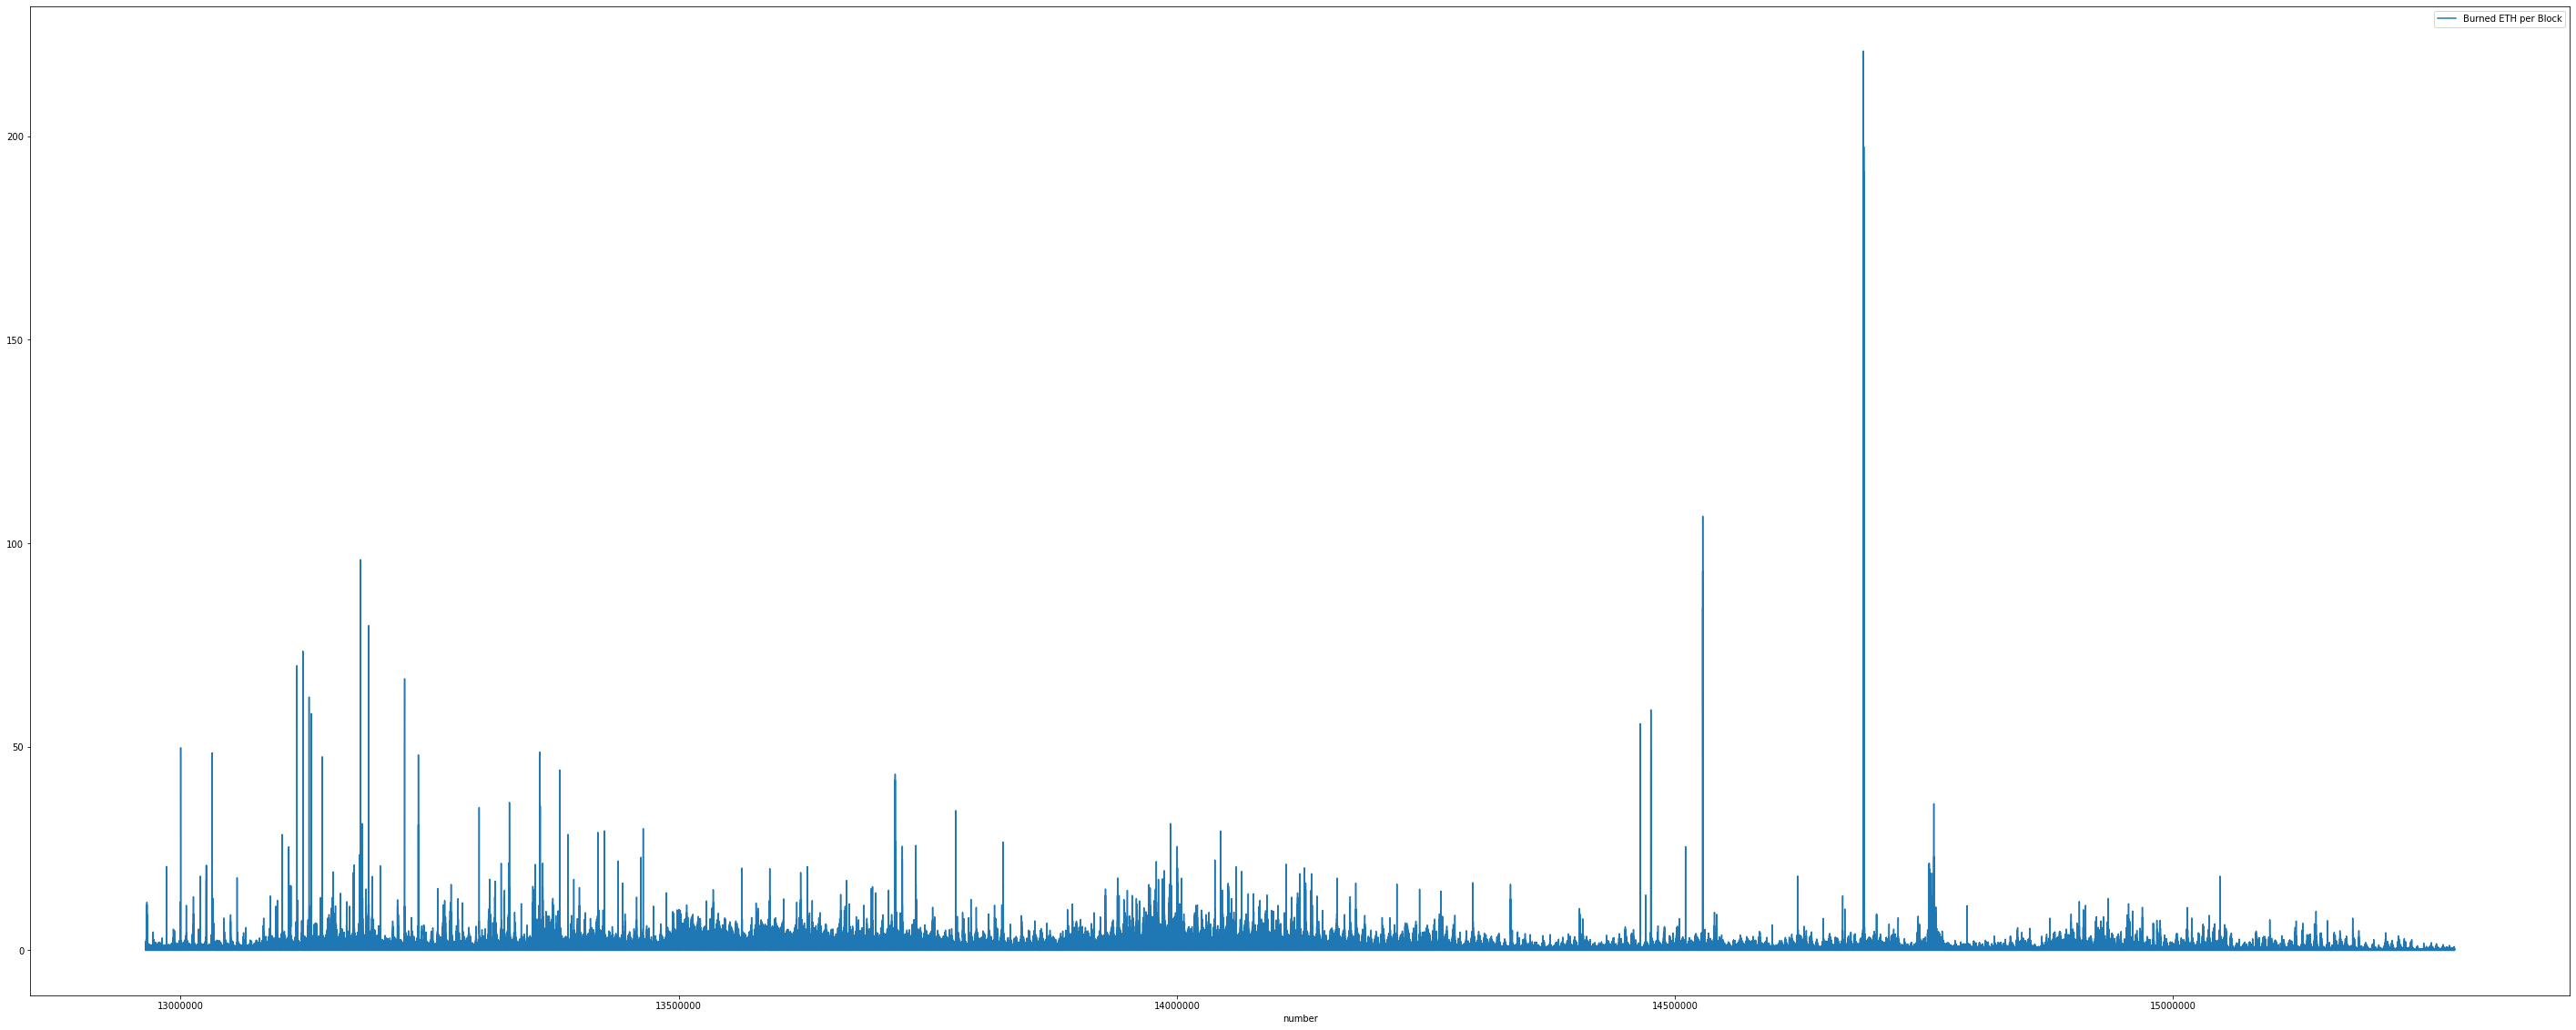

In [132]:
lines = df.plot.line(x='number', y='Burned ETH per Block', figsize=(50, 20))
lines.ticklabel_format(useOffset=False, style='plain')